<a href="https://colab.research.google.com/github/himoyuzuki/colab_analytics/blob/main/%E4%B8%8D%E7%A2%BA%E5%AE%9F%E6%80%A7%E5%9B%9E%E9%81%BF%E6%8C%87%E6%95%B0%E3%81%A8%E6%B0%91%E4%B8%BB%E4%B8%BB%E7%BE%A9%E6%8C%87%E6%95%B0%E3%81%AE%E9%96%A2%E4%BF%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 不確実性回避指数と民主主義指数の関係

>[不確実性回避指数](https://clearlycultural.com/geert-hofstede-cultural-dimensions/uncertainty-avoidance-index)とは、オランダの社会科学者ヘールト・ホフステッドが開発したホフステッド異文化モデルの指標の一つで、将来が不確定であることや予想できない状態を避けたいと思うかどうかを測る指数である。(Gemini)

In [ ]:
import requests
import pandas as pd
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [ ]:
# 民主主義指数のデータ取得
# Fetch the data.
df = pd.read_csv(
    "https://ourworldindata.org/grapher/democracy-index-eiu.csv?v=1&csvType=full&useColumnShortNames=false",
    storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'}
    )

# Fetch the metadata
metadata = requests.get(
    "https://ourworldindata.org/grapher/democracy-index-eiu.metadata.json?v=1&csvType=full&useColumnShortNames=false"
    ).json()

In [ ]:
dem2023_df = df[df['Year'] == 2023]
dem2023_df = dem2023_df.rename(columns={'Entity': 'Country'})

In [ ]:
dem2023_df.head()

,Country,Code,Year,Democracy index,World regions according to OWID
15,Afghanistan,AFG,2023,0.26000,Asia
32,Africa,NaN,2023,3.96740,NaN
49,Africa (population-weighted),NaN,2023,3.88129,NaN
51,Aland Islands,ALA,2023,NaN,Europe
67,Albania,ALB,2023,6.28000,Europe


In [ ]:
# 不確実性回避指数のデータ取得
url = 'https://clearlycultural.com/geert-hofstede-cultural-dimensions/uncertainty-avoidance-index'
dfs = pd.read_html(url)
uns_df = dfs[1]

In [ ]:
uns_df = uns_df.rename(columns=uns_df.iloc[0])
uns_df = uns_df.drop([uns_df.index[0], uns_df.index[1]])
for col in uns_df.columns[1:]:
    uns_df[col] = pd.to_numeric(uns_df[col], errors='coerce')

In [ ]:
uns_df.head()

,Country,PDI,IDV,MAS,UAI,LTO
2,Greece,60,35,57,112,NaN
3,Portugal,63,27,31,104,NaN
4,Guatemala,95,6,37,101,NaN
5,Uruguay,61,36,38,100,NaN
6,Belgium,65,75,54,94,NaN


**解説**

- PDI...Power Distance Index。組織や制度（家族など）の権力の弱いメンバーが、権力が不平等に分配されていることをどの程度受け入れ、期待しているかを測定。高いほど分配を期待している
- IDV...Individualism。個人主義か集団主義か。個人がグループに統合される度合い。高いほど個人主義
- MAS...Masculinity。男らしさか女らしさのどちらがより強いか。男性的な特徴には、積極性、物質主義/物質的成功、自己中心性、権力、強さ、個人の業績などがある
    - IBM の調査では、
    - (a) 女性の価値観は男性の価値観ほど社会間で差がない
    - (b) 国によって男性の価値観は、一方では非常に自己主張が強く競争的で女性の価値観と最大限に異なるものから、他方では控えめで思いやりがあり女性の価値観に似ているものまで、さまざまな側面がある
    - ということが分かった
- UAI...Uncertanity Avoidance Index。社会の不確実性と曖昧性に対する許容度を扱い、究極的には人間の真実の探求を指す。これは特定の文化が、国民に対して非構造的な状況に対して、どの程度快または不快を感じさせるかという程度を表す。高いほど不確実性を回避する傾向が高い
- LTO...Long-Term Orientation。長期志向。東洋と西洋の考え方の違いを区別するために、元の 4 つの次元の後に追加された。中国との近さかな。
    - 長期志向とは、粘り強さ（地位によって関係を整理し、その順序を守る）、倹約、恥の感覚を持つなど
    - 短期的な方向性とは、個人の安定と安定性、自分の「面子」を守ること、敬意または伝統、挨拶、好意、贈り物の返礼


              PDI        IDV        MAS         UAI         LTO
count   66.000000  66.000000  66.000000   66.000000   25.000000
mean    60.212121  41.166667  50.166667   65.060606   43.840000
std     20.854452  23.175307  17.069616   22.367476   28.440992
min     11.000000   6.000000   5.000000    8.000000   16.000000
25%     46.750000  20.000000  41.250000   51.250000   25.000000
50%     64.000000  38.000000  51.000000   68.000000   31.000000
75%     77.000000  59.500000  62.750000   84.250000   61.000000
max    104.000000  91.000000  95.000000  112.000000  118.000000
Country     0
PDI         0
IDV         0
MAS         0
UAI         0
LTO        41
dtype: int64


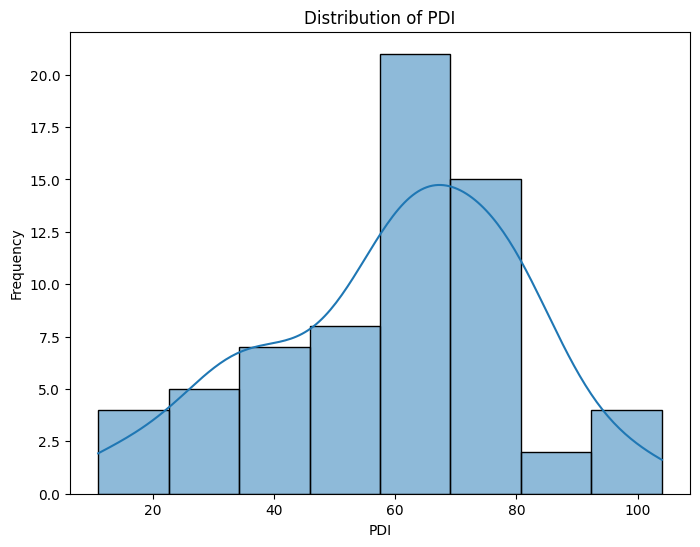

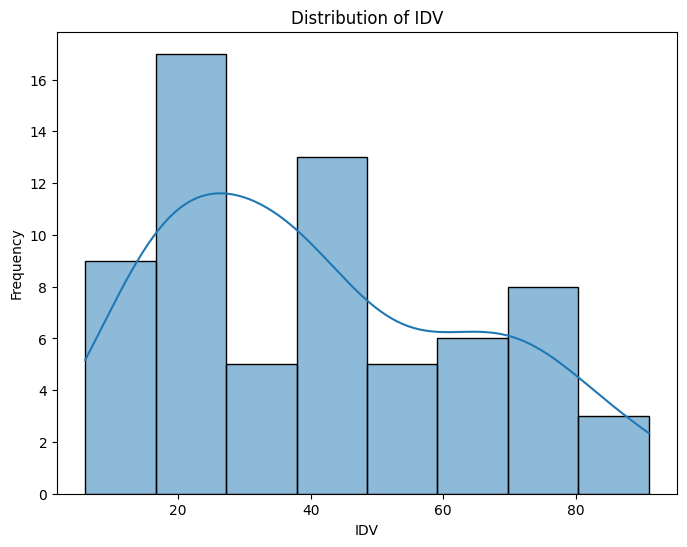

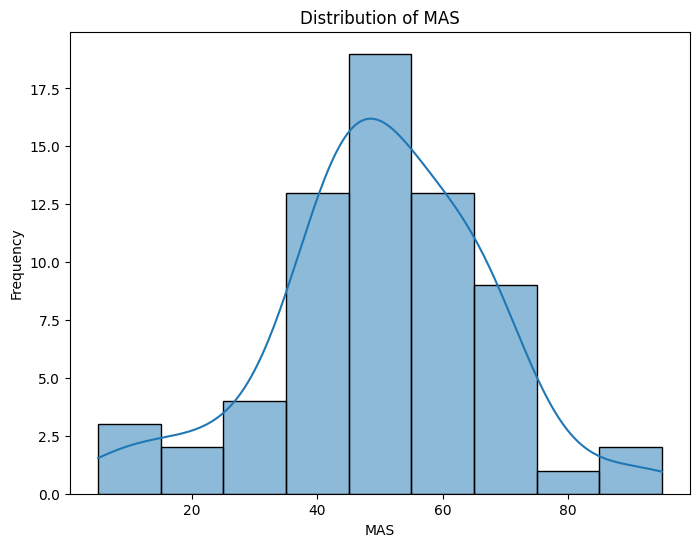

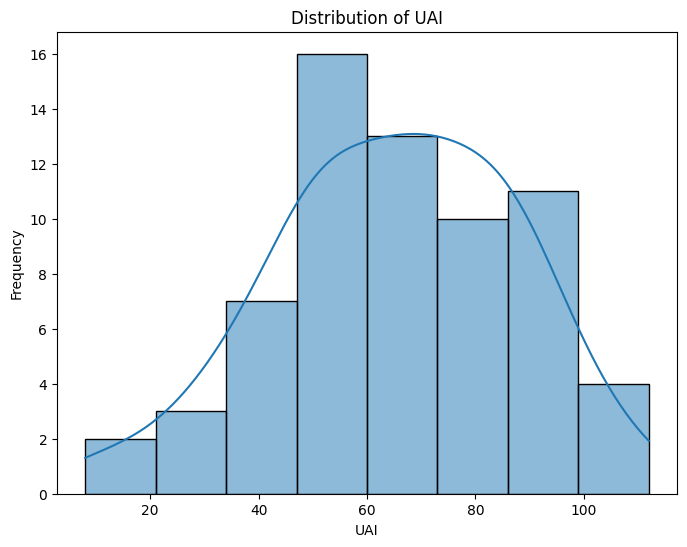

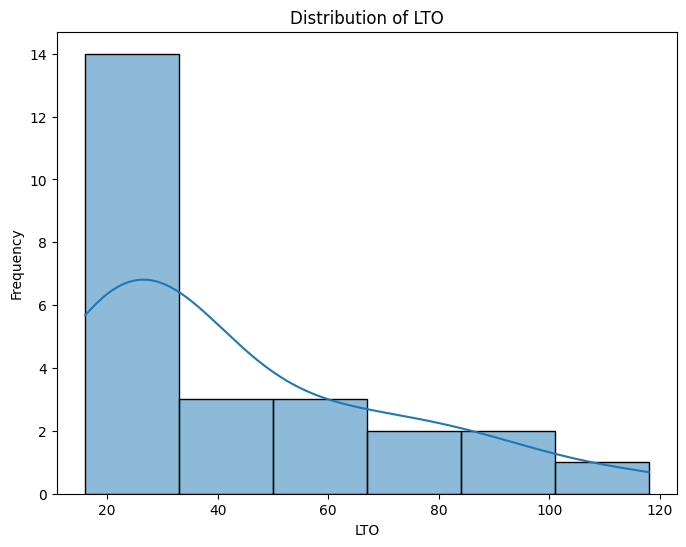

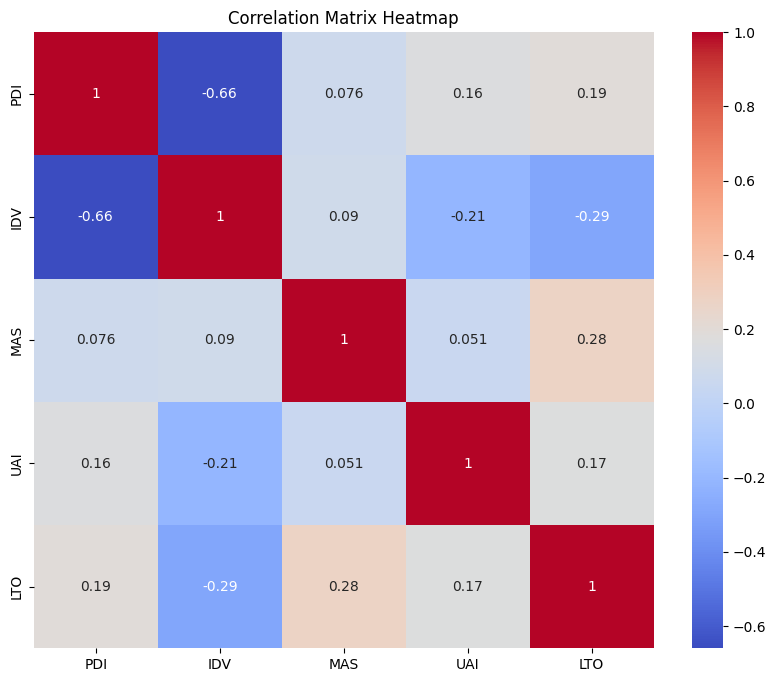

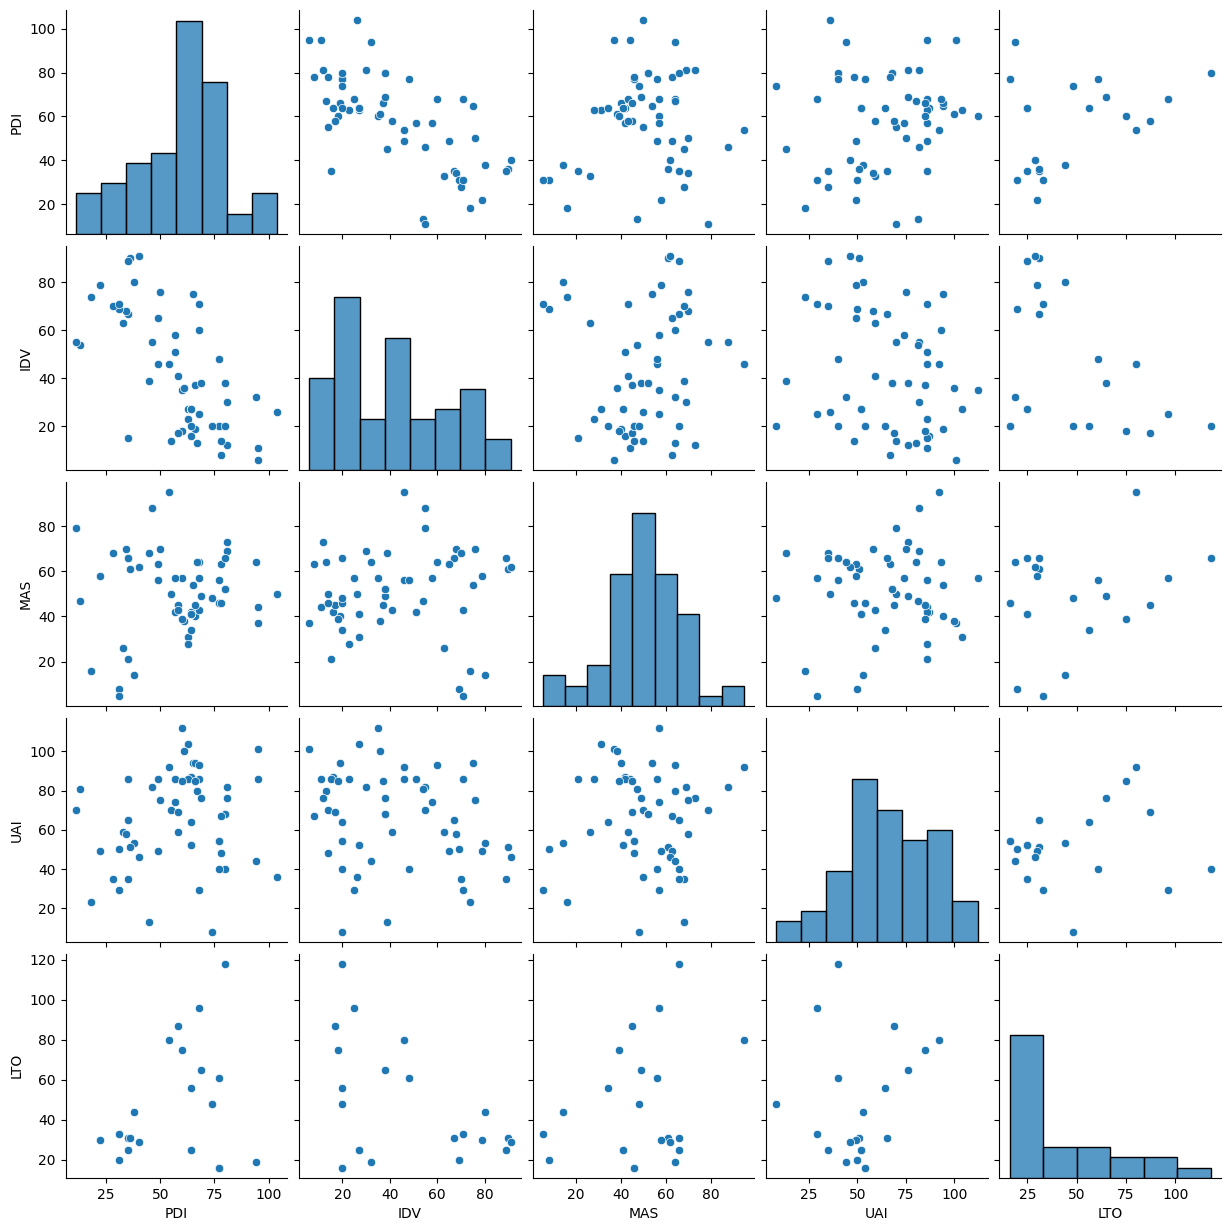

In [ ]:
# 不確実性回避指数の基礎分析
print(uns_df.describe())

# Check for missing values
print(uns_df.isnull().sum())

# Visualize the distribution of each numerical feature
numerical_features = ['PDI', 'IDV', 'MAS', 'UAI', 'LTO']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(uns_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(uns_df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Explore relationships between numerical features using pairplot
sns.pairplot(uns_df[numerical_features])
plt.show()

In [ ]:
# 不確実性回避指数と民主主義指数の関係性の分析
merged_df = pd.merge(dem2023_df[['Country', 'Democracy index']], uns_df[['Country', 'UAI']], on='Country', how='outer')
merged_df = merged_df.dropna()
merged_df.head()

,Country,Democracy index,UAI
11,Argentina,6.62,86.0
16,Australia,8.66,51.0
17,Austria,8.28,70.0
25,Belgium,7.64,94.0
34,Brazil,6.68,76.0


In [ ]:
# 散布図プロットの作成
fig = go.Figure(data=go.Scatter(
    x=merged_df['Democracy index'],
    y=merged_df['UAI'],
    mode='markers+text',
    text=merged_df['Country'],
    textposition="bottom center",
    marker=dict(
        size=10,
        opacity=0.7
    )
))

# レイアウトの設定
fig.update_layout(
    title='Democracy Index and Uncertanity Avoidance Index (UAI)',
    xaxis_title='Democracy index',
    yaxis_title='UAI',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

# プロットの表示
fig.show()

こうして見ると、日本は不確実性を避けたがるわけだがそこまで民主主義スコアが高いわけでもない。似たような国として韓国は想像通りだが、コスタリカ、ウルグアイに似た傾向があるのは意外

In [ ]:
# ピアソンの相関係数と p値を計算
corr, p_value = pearsonr(merged_df['Democracy index'], merged_df['UAI'])

print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation Coefficient: -0.040
P-value: 0.751


当然ながら相関傾向は見られない